### Honey Production Analysis

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Content
Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - numcol: Number of colonies producing honey. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - yieldpercol: Honey yield per colony. Unit is pounds
  - totalprod: Total production (numcol x yieldpercol). Unit is pounds
  - stocks: Refers to stocks held by producers. Unit is pounds
  - priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
  - prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
  - Other useful information: Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

#### Inspiration
   - How has honey production yield changed from 1998 to 2012?
   - Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
   - Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?
   - Are there any patterns that can be observed between total honey production and value of production every year?
   - How has value of production, which in some sense could be tied to demand, changed every year?


#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

#### Import the honeyproduction.csv file

In [2]:
mydata = pd.read_csv("honeyproduction.csv")

In [3]:
mydata

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
621    VA    4000.0           41    164000.0     23000.0        3.77   
622    WA   62000.0           41   2542000.0   1017000.0        2.38   
623    WV    6000.0           48    288000.0     95000.0        2.91   
624    WI   60000.0           69   4140000.0   1863000.0        2.05   
625    WY   50000.0           51   2550000.0    459000.0        1.87   

      prodvalue  year  
0      818000.0  1998  
1     2112000.0  1998  
2     2033000.0  1998  
3    23157000.0  1998  
4     1361000.0  1998  
..          ...   ...  
621    618000.0  2012  
622   6050000.0  2012  
623    838000.0  2012  
624   8487000.0  2012  
625   4769000.0  2012  

[626 rows x 8 columns]

#### Explore the data for non-null and extreme values

In [4]:
mydata.head()

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
#statistical summary
mydata.describe().round()

numcol  yieldpercol   totalprod      stocks  priceperlb   prodvalue  \
count     626.0        626.0       626.0       626.0       626.0       626.0   
mean    60284.0         62.0   4169086.0   1318859.0         1.0   4715741.0   
std     91077.0         19.0   6883847.0   2272964.0         1.0   7976110.0   
min      2000.0         19.0     84000.0      8000.0         0.0    162000.0   
25%      9000.0         48.0    475000.0    143000.0         1.0    759250.0   
50%     26000.0         60.0   1533000.0    439500.0         1.0   1841500.0   
75%     63750.0         74.0   4175250.0   1489500.0         2.0   4703250.0   
max    510000.0        136.0  46410000.0  13800000.0         4.0  69615000.0   

         year  
count   626.0  
mean   2005.0  
std       4.0  
min    1998.0  
25%    2001.0  
50%    2005.0  
75%    2009.0  
max    2012.0

In [7]:
#see the record for just one state
mydata[mydata['state']=='IL']

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
9      IL   9000.0           71   639000.0  204000.0        1.19   760000.0   
52     IL   9000.0           66   594000.0  327000.0        1.15   683000.0   
95     IL   8000.0           61   488000.0  146000.0        1.17   571000.0   
138    IL   6000.0           76   456000.0  251000.0        1.58   720000.0   
182    IL   9000.0           80   720000.0  130000.0        1.47  1058000.0   
226    IL   7000.0           60   420000.0  252000.0        1.83   769000.0   
270    IL   7000.0           55   385000.0  193000.0        1.86   716000.0   
311    IL   8000.0           85   680000.0  408000.0        1.84  1251000.0   
352    IL  10000.0           66   660000.0  356000.0        2.14  1412000.0   
393    IL   9000.0           63   567000.0  374000.0        2.49  1412000.0   
434    IL   8000.0           56   448000.0  116000.0        2.59  1160000.0   
475    IL   8000.0           34   272000.0   57000.0        2.55   694000.0   
515    IL   9000.0           41   369000.0   92000.0        2.78  1026000.0   
555    IL   7000.0           50   350000.0   98000.0        3.90  1365000.0   
595    IL   7000.0           61   427000.0  145000.0        3.55  1516000.0   

     year  
9    1998  
52   1999  
95   2000  
138  2001  
182  2002  
226  2003  
270  2004  
311  2005  
352  2006  
393  2007  
434  2008  
475  2009  
515  2010  
555  2011  
595  2012

#### How many States are included in the dataset?

In [8]:
mydata['state'].nunique()

44

#### Which are the States that are included in this dataset?

In [9]:
mydata['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [10]:
#For some states the data is missing, we don't have it for all the years
mydata['state'].value_counts()

AL    15
SD    15
NJ    15
NM    15
NY    15
NC    15
ND    15
OH    15
OR    15
PA    15
TN    15
MT    15
TX    15
UT    15
VT    15
VA    15
WA    15
WV    15
WI    15
WY    15
AZ    15
NE    15
MO    15
IN    15
AR    15
CA    15
CO    15
FL    15
GA    15
HI    15
ID    15
IL    15
IA    15
KS    15
KY    15
LA    15
ME    15
MI    15
MN    15
MS    15
NV    11
OK     6
MD     6
SC     3
Name: state, dtype: int64

#### Calculate the average production for each state across all years

In [11]:
mydata[['state','totalprod']].groupby('state').mean()

totalprod
state              
AL     8.254667e+05
AR     2.810400e+06
AZ     2.032267e+06
CA     2.316900e+07
CO     1.750600e+06
FL     1.646987e+07
GA     3.299933e+06
HI     8.431333e+05
IA     2.080000e+06
ID     4.410667e+06
IL     4.983333e+05
IN     4.840000e+05
KS     7.079333e+05
KY     2.296667e+05
LA     3.627333e+06
MD     2.110000e+05
ME     2.467333e+05
MI     4.854667e+06
MN     9.624000e+06
MO     8.715333e+05
MS     1.456867e+06
MT     1.043747e+07
NC     5.427333e+05
ND     3.167233e+07
NE     3.158600e+06
NJ     3.995333e+05
NM     4.764667e+05
NV     4.392727e+05
NY     3.937467e+06
OH     1.040067e+06
OK     2.011667e+05
OR     2.121400e+06
PA     1.295600e+06
SC     3.433333e+05
SD     1.774273e+07
TN     4.077333e+05
TX     6.993600e+06
UT     1.179067e+06
VA     2.665333e+05
VT     3.880667e+05
WA     2.687733e+06
WI     5.455533e+06
WV     3.212000e+05
WY     2.617933e+06

In [12]:
#top 5 states by prod
mydata[['state','totalprod']].groupby('state').mean().round().sort_values('totalprod',ascending=False).head()

totalprod
state            
ND     31672333.0
CA     23169000.0
SD     17742733.0
FL     16469867.0
MT     10437467.0

In [13]:
#bottom 5 states by prod
mydata[['state','totalprod']].groupby('state').mean().round().sort_values('totalprod',ascending=False).tail()

totalprod
state           
VA      266533.0
ME      246733.0
KY      229667.0
MD      211000.0
OK      201167.0

#### How many years data is provided in the dataset? And what is the starting and ending year?

In [14]:
mydata['year'].nunique()

15

In [15]:
mydata['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [16]:
mydata['year'].max()

2012

In [17]:
mydata['year'].min()

1998

#### Which State has seen highest volume in production, and in which year?

In [18]:
#amount
mydata['totalprod'].max()

46410000.0

In [19]:
#save the max total prod in a variable
max_prod=mydata['totalprod'].max()
max_prod

46410000.0

In [20]:
mydata['totalprod']==max_prod

0      False
1      False
2      False
3      False
4      False
       ...  
621    False
622    False
623    False
624    False
625    False
Name: totalprod, Length: 626, dtype: bool

In [21]:
mydata[mydata['totalprod']==max_prod]

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
532    ND  510000.0           91  46410000.0  12995000.0         1.5   

      prodvalue  year  
532  69615000.0  2010

In [22]:
#one line
mydata[mydata['totalprod'] == mydata['totalprod'].max()]

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
532    ND  510000.0           91  46410000.0  12995000.0         1.5   

      prodvalue  year  
532  69615000.0  2010

#### What is the average yield per colony , for each year?

In [23]:
s=mydata.groupby(['year'])['yieldpercol'].mean().round()

In [24]:
#convert series into a df
df=s.to_frame()
df

yieldpercol
year             
1998         70.0
1999         65.0
2000         68.0
2001         65.0
2002         67.0
2003         63.0
2004         65.0
2005         64.0
2006         62.0
2007         59.0
2008         61.0
2009         54.0
2010         56.0
2011         55.0
2012         55.0

In [25]:
# other option
mydata[['year', 'yieldpercol']].groupby(['year']).mean().round()

yieldpercol
year             
1998         70.0
1999         65.0
2000         68.0
2001         65.0
2002         67.0
2003         63.0
2004         65.0
2005         64.0
2006         62.0
2007         59.0
2008         61.0
2009         54.0
2010         56.0
2011         55.0
2012         55.0

In [26]:
# sort in descending order
mydata[['year', 'yieldpercol']].groupby('year').mean().round().sort_values('yieldpercol',ascending=False).head()

yieldpercol
year             
1998         70.0
2000         68.0
2002         67.0
1999         65.0
2001         65.0

#### Is there correlation between any 2 Numeric variables? Test for the same using Visual techniques

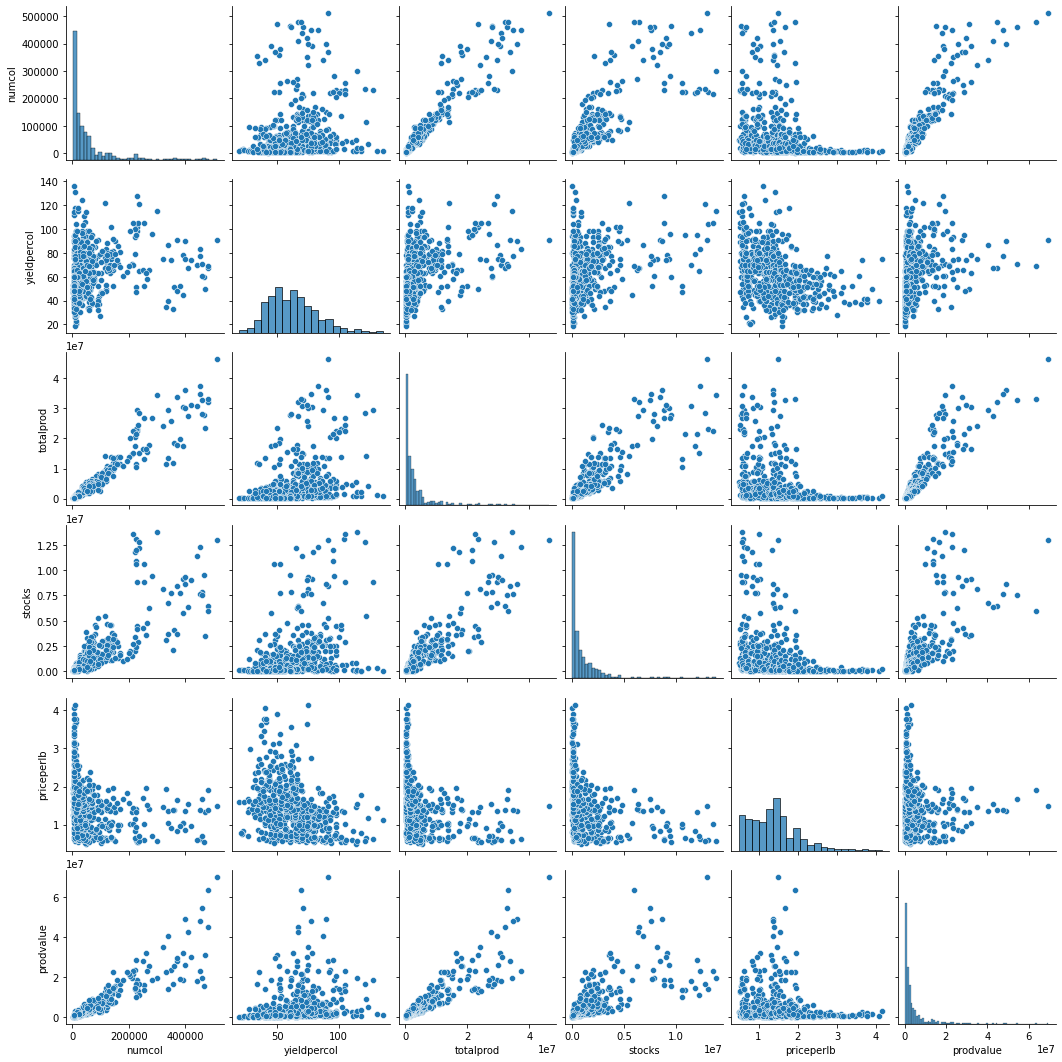

In [27]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']]);

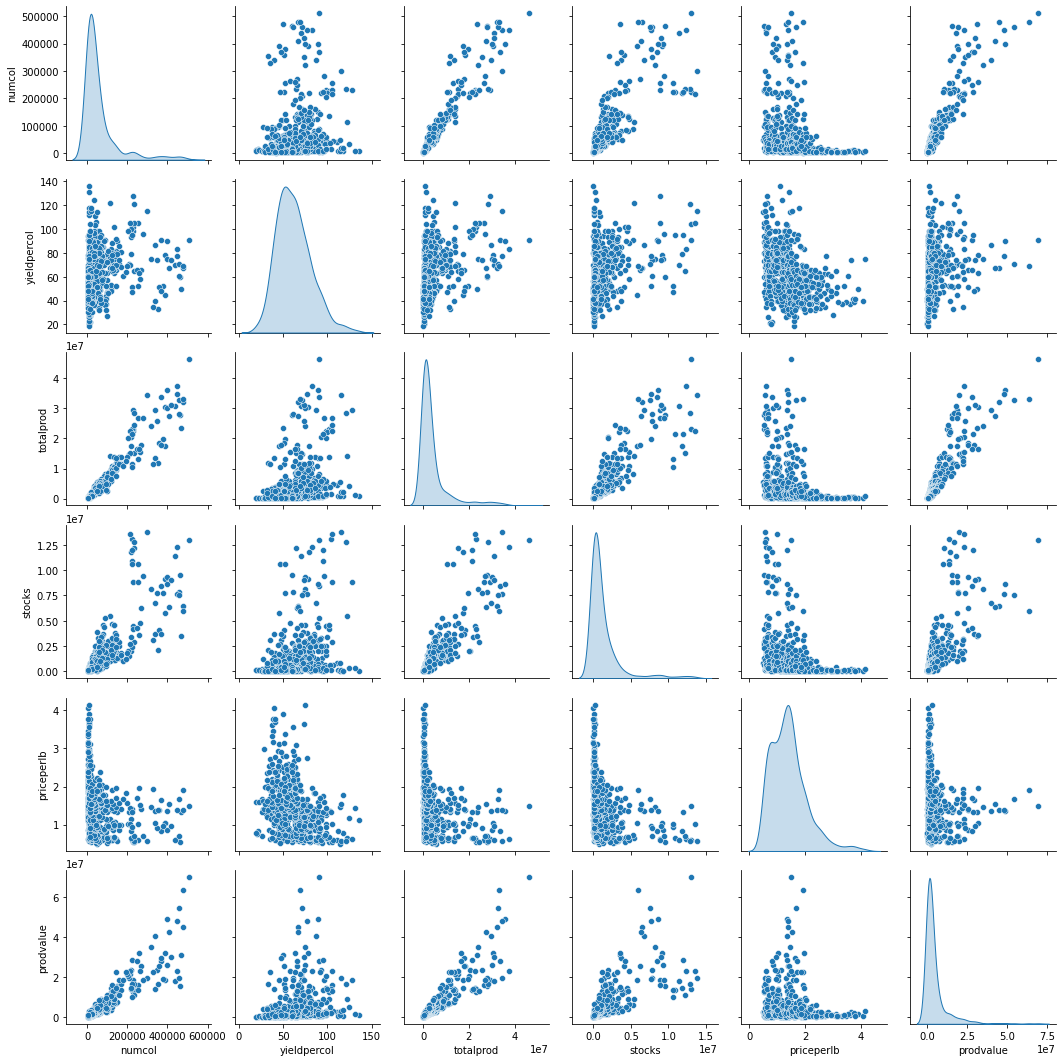

In [28]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']],diag_kind='kde');

In [29]:
#using corr coefficient
mydf= mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']]
mydf.head()

numcol  yieldpercol   totalprod      stocks  priceperlb   prodvalue
0   16000.0           71   1136000.0    159000.0        0.72    818000.0
1   55000.0           60   3300000.0   1485000.0        0.64   2112000.0
2   53000.0           65   3445000.0   1688000.0        0.59   2033000.0
3  450000.0           83  37350000.0  12326000.0        0.62  23157000.0
4   27000.0           72   1944000.0   1594000.0        0.70   1361000.0

In [30]:
cor =mydf.corr()

In [31]:
cor

numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue
numcol       1.000000     0.243515   0.953594  0.825929   -0.232701   0.912796
yieldpercol  0.243515     1.000000   0.396252  0.367812   -0.358646   0.278977
totalprod    0.953594     0.396252   1.000000  0.878830   -0.264499   0.907236
stocks       0.825929     0.367812   0.878830  1.000000   -0.305867   0.728560
priceperlb  -0.232701    -0.358646  -0.264499 -0.305867    1.000000  -0.089567
prodvalue    0.912796     0.278977   0.907236  0.728560   -0.089567   1.000000

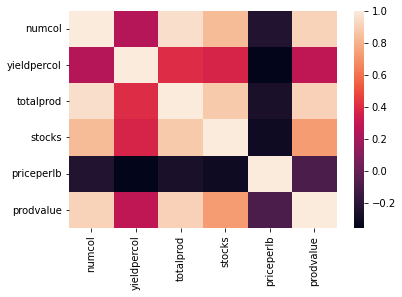

In [32]:
sns.heatmap(cor);

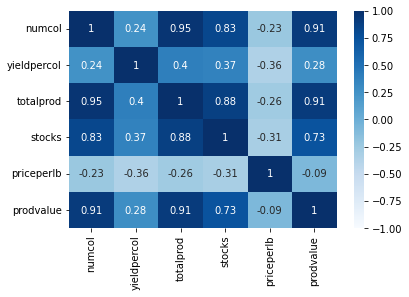

In [33]:
sns.heatmap(cor,annot=True,vmin=-1,vmax=1,cmap='Blues');

#### What is the general Production trend from 1998 to 2012? Describe visually

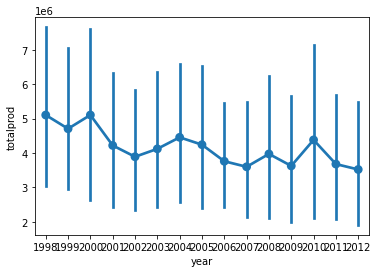

In [34]:
sns.pointplot(x=mydata['year'],y= mydata['totalprod']);

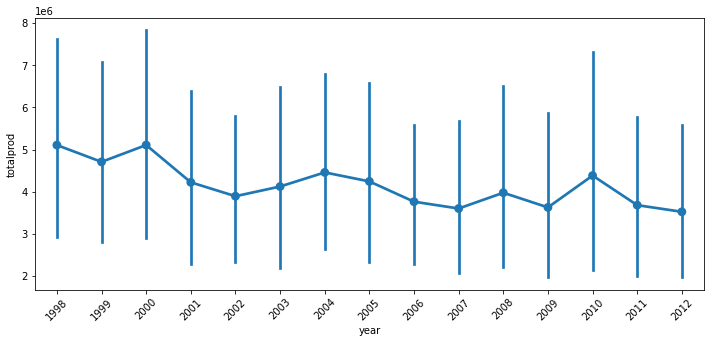

In [35]:
plt.subplots(figsize=(12,5))
sns.pointplot(x=mydata['year'], y=mydata['totalprod']);
plt.xticks(rotation =45);

#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

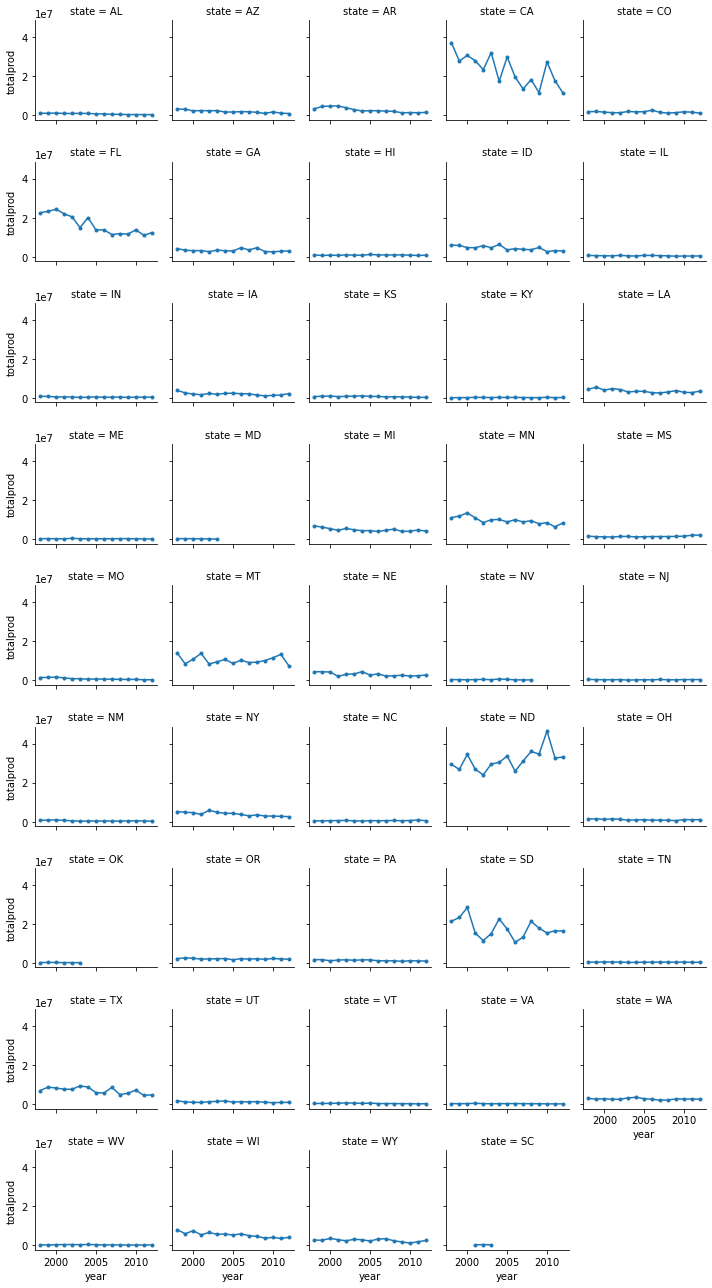

In [36]:
g = sns.FacetGrid(mydata, col="state", col_wrap=5, height=2)
g = g.map(plt.plot, "year", "totalprod", marker=".")

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

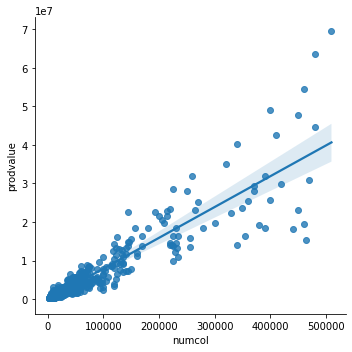

In [37]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata);

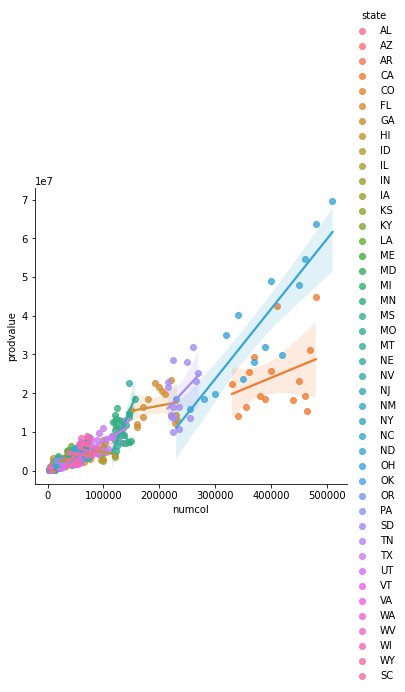

In [38]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata,hue='state');

In [39]:
some_states=mydata[(mydata['state']=='CA') | (mydata['state']=='FL')|(mydata['state']=='ND')]

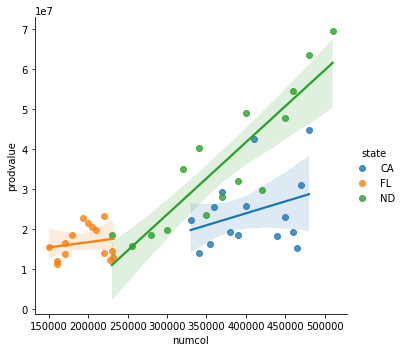

In [40]:
sns.lmplot(x="numcol", y="prodvalue", data=some_states,hue='state');

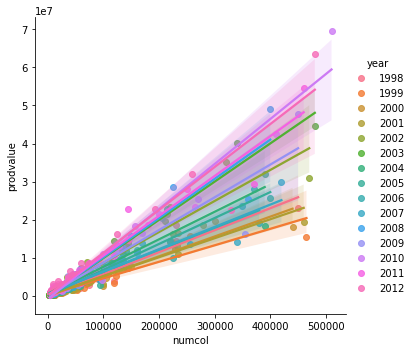

In [41]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='year');

In [42]:
# Interactive scatter plot using plotly package
import plotly.express as px

In [43]:
mydata.head()

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998

In [44]:
px.scatter(mydata, x = 'numcol', y = 'prodvalue', animation_frame = 'year', size = 'priceperlb')

#### Check the distribution of total production across each year and each state, using boxplots

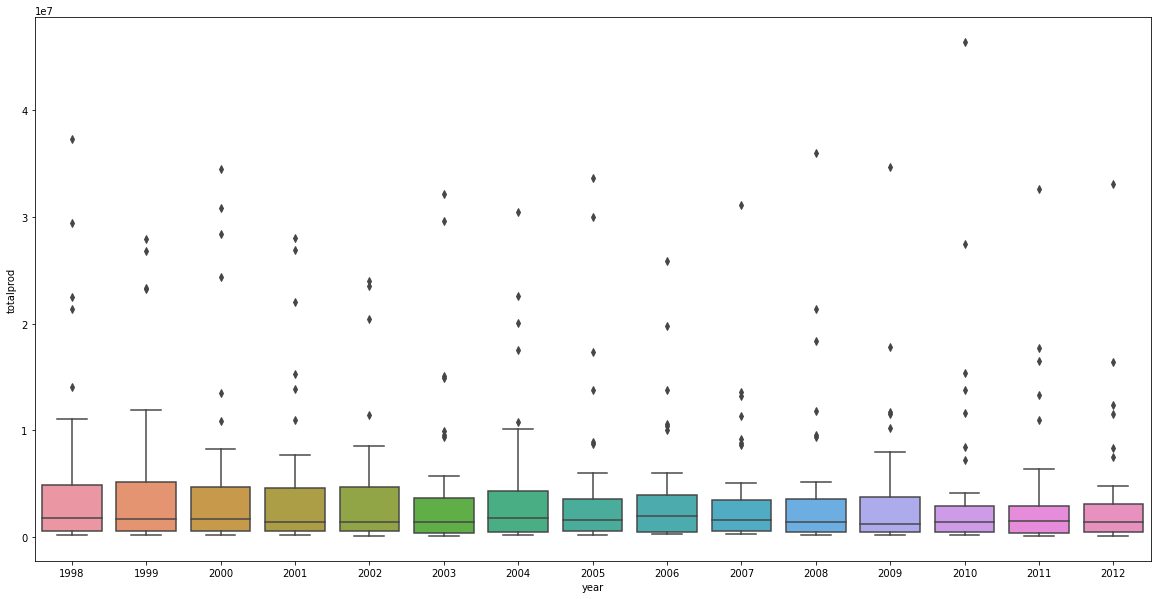

In [45]:
#distribution across each year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='year',y='totalprod',data=mydata);

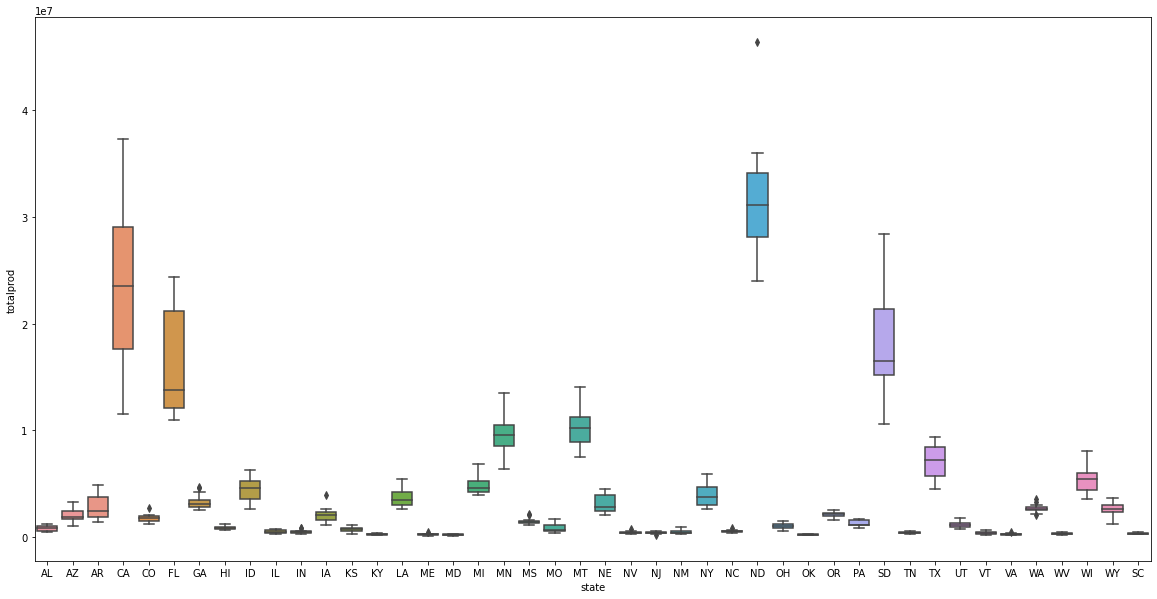

In [46]:
#distribution across each state
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='state',y='totalprod',data=mydata);

#### How has the Value in Production changed over the years?

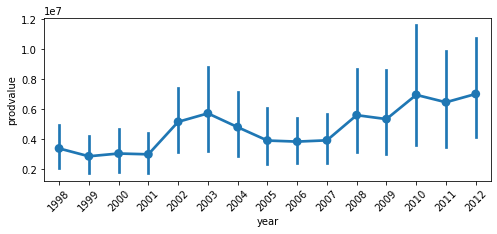

In [47]:
plt.figure(figsize=(8,3))
sns.pointplot(x=mydata['year'], y=mydata['prodvalue'])
plt.xticks(rotation=45);

#### What is the linear relationship between Production volume & value over the years?

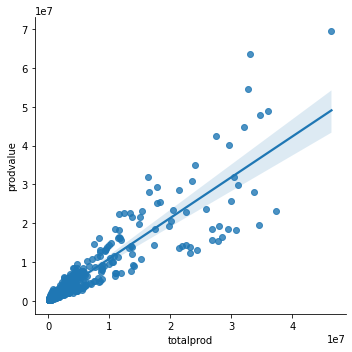

In [48]:
sns.lmplot(x="totalprod", y="prodvalue", data=mydata);